# This is for solving nonlinear univariate equations

Only polynomial of degree <= 4 has formulas

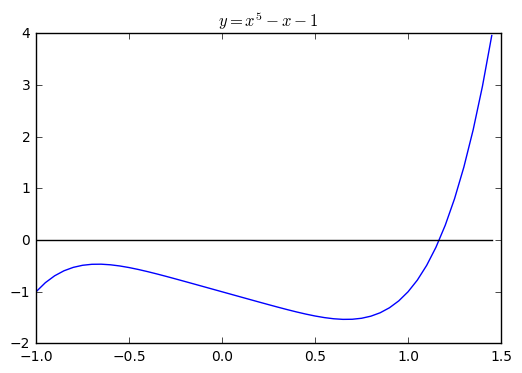

In [1]:
#graph y=x^5-x-1
import numpy as np
import matplotlib.pyplot as plt
def f(x): return x**5 - x - 1
x = np.arange(-1,1.5,0.05)
plt.plot(x,f(x),x,0*x,'k')
plt.title(r'$y=x^5-x-1$')
plt.show()

In [2]:
#Finding the root
#this method is by Brent (1973)
from scipy.optimize import brentq
brentq(f,-1,1.5)

1.1673039782615267

How does the function brentq find the root? We will learn three methods: Bisection, Newton, and Secant methods.

## Bisection Method

IVT

In [7]:
#Bisection method for finding roots of f(x) on a given interval [l,r]
l = 1
r = 1.5
tol = 10**-15
cnt = 1
yl = f(l)
yr = f(r)
while abs(l-r)>tol and cnt<100:
    c = (l+r)/2
    yc = f(c)
    if yc==0:break
    if np.sign(yc)*np.sign(yr)<0:
        l = c
        yl = yc
    if np.sign(yc)*np.sign(yl)<0:
        r = c
        yr = yc
    cnt = cnt + 1
print(cnt)
c

50


1.167303978261418

## Newton's method

Formula derivation

In [9]:
def df(x): return 5*x**4-1

In [22]:
#newton's method
x = 0.0 #x=0 is bad initial value
tol = 10**-14
cnt = 1
while abs(f(x))>tol and cnt < 10:
    x = x - f(x)/df(x)
    cnt = cnt + 1
x 
print(cnt)

4


Initial value is important. Newton's method is however very sensitive to initial value. Try x=0

Another drawback is that we need to know its derivative

# Secant Method

In [21]:
#secant method
x0 = 1.17 #initial value
x1 = 1.18 #initial value
tol = 10**-14
cnt = 1

while abs(f(x0)) > tol and cnt < 100:
    x = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
    x0 = x1
    x1 = x
    cnt = cnt + 1
print(cnt)
x

6


1.1673039782614187

# Fixed point

In [23]:
import math 
def phi(x): return math.exp(-x)

In [30]:
x = 0.0
cnt = 1
while cnt < 4:
    x = phi(x)
    cnt = cnt + 1
print(x)

0.692200627555


In [25]:
def phim(x): return phi(x)-x
brentq(phim,-1,1)

0.567143290409784

In [28]:
def  Newton(Initial, Iter, f, df): 
    cnt = 1
    x = Initial
    while cnt < Iter:
        x = x - f(x)/df(x)
        cnt = cnt + 1
    return x

In [29]:
def dphim(x): return -math.exp(-x) - 1
Newton (0.0, 4, phim,dphim)

0.5671431650348622